<a href="https://colab.research.google.com/github/rpathak38/SongRecommender/blob/main/MiniBatch1k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import time

TRAINING_DATA_SIZE = 1000
SEED = input("Enter a Seed")

def convertSeconds2HMS(x):
    hours = int (x / 3600)
    x = x - 3600 * hours
    minutes = int (x / 60)
    x = x - 60 * minutes
    seconds = round(x, 3)
    print("The elapsed time is " + str(hours) + " H: " + str(minutes) + " M: " + str(seconds) + " S\n")
begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")


#import tensorflow as tf
import csv
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
#print(tf.__version__) #required => >= 2.0.0
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
print("imports successful")

end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

Enter a Seed7
STARTING TIME: 1608272398.4947813

imports successful

ENDING TIME: 1608272398.9284089
The elapsed time is 0.4336276054382324 seconds
The elapsed time is 0 H: 0 M: 0.434 S



In [3]:
begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")
for x in range(1,TRAINING_DATA_SIZE):
    print(x)
end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

STARTING TIME: 1608272398.944844

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
26

In [4]:
import time
begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")
label_names = []
music_labels = []
label_index = []
music_data = []
with open("/content/drive/MyDrive/Music Recommender/datasClean.csv", "r", encoding="utf-8") as music_file:

    music_reader  = csv.reader(music_file, delimiter = ",")
    
    headingRow = next(music_reader)
    for row in music_reader:
      #music_labels.append(row[8])
      label_index.append(int(row[1]))
      label_names.append(row[0])
      music_data.append([row[11], row[0], row[13], row[1], row[2], row[3], row[4], row[5], row[6], row [7], row[9], row[10]])

print("data transfer complete")
    
end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

STARTING TIME: 1608272399.0472193

data transfer complete

ENDING TIME: 1608272400.1421726
The elapsed time is 1.0949532985687256 seconds
The elapsed time is 0 H: 0 M: 1.095 S



In [5]:
import time
from random import Random
myRand4 = Random(SEED)
begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")
thing1 = music_data[0:]
myRand4.shuffle(thing1)
#random.shuffle(thing1)
#X = np.array(music_data[:, 1:TRAINING_DATA_SIZE])
thing2 = [ item[3:] for item in thing1 ]

#print(music_labels[0:30])
#print(label_index[0:30])
#print(label_names[0:TRAINING_DATA_SIZE])
#print("\n")
#print(music_data[1:TRAINING_DATA_SIZE])
#print(len(music_labels))
#print(len(label_index))
#print(len(music_data))

print(thing2[0:TRAINING_DATA_SIZE])
#thing3 = thing2[2:TRAINING_DATA_SIZE]
#print(thing3)

end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

STARTING TIME: 1608272400.1684825

[['1', '0.14800000000000002', '0.782', '0.589', '0.0', '0.16399999999999998', '-4.827', '0.8690000000000001', '90.43799999999999'], ['0', '0.948', '0.0', '2.0300000000000002e-05', '0.33399999999999996', '0.114', '-16.355', '0.0', '0.0'], ['1', '0.972', '0.226', '0.10099999999999999', '0.889', '0.21899999999999997', '-20.035999999999998', '0.156', '75.23'], ['1', '0.985', '0.49', '0.12300000000000001', '0.0754', '0.179', '-22.413', '0.544', '172.12900000000005'], ['1', '0.0552', '0.615', '0.631', '0.000729', '0.0193', '-8.717', '0.965', '170.53400000000005'], ['0', '0.995', '0.723', '0.22399999999999998', '0.8240000000000001', '0.17300000000000001', '-14.008', '0.6709999999999999', '78.499'], ['1', '0.0307', '0.385', '0.951', '1.36e-05', '0.113', '-4.198', '0.797', '192.322'], ['0', '0.00592', '0.498', '0.847', '3.95e-06', '0.43', '-4.716', '0.29', '110.01799999999999'], ['0', '0.8420000000000001', '0.261', '0.192', '1.6899999999999994e-05', '0.154', '

In [6]:
import time
begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")
#Creating the music recommendation data in array form
X = np.array(thing2[0:TRAINING_DATA_SIZE])

#Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

#Principal components analysis
pca = PCA(n_components = 2)
pca.fit(X)
X = pca.transform(X)
print(X)

end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

STARTING TIME: 1608272400.9428213

[[-2.04585203 -1.01198766]
 [ 4.23988581  1.42410463]
 [ 3.80871098  0.70459815]
 ...
 [ 1.06435878 -1.36308662]
 [-1.37520105  0.80026029]
 [-1.4489279  -0.86581026]]

ENDING TIME: 1608272400.9761133
The elapsed time is 0.03329205513000488 seconds
The elapsed time is 0 H: 0 M: 0.033 S



STARTING TIME: 1608272400.9961264



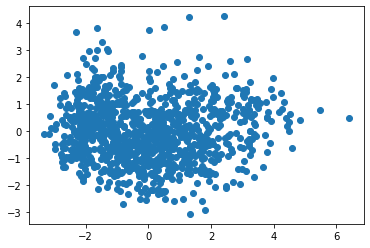


ENDING TIME: 1608272401.1896563
The elapsed time is 0.19352984428405762 seconds
The elapsed time is 0 H: 0 M: 0.194 S



In [7]:
import time
begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")

import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

#Plotting the data points
plt.figure()
plt.scatter(X[:,0], X[:,1], label = 'True Position')
plt.show()

end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

In [8]:
import time
begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")

sse = []
n_clusters = range(1,TRAINING_DATA_SIZE)
for k in n_clusters:
    begin1 = time.time()
    #kmeans = KMeans(n_clusters = k, max_iter = 3, n_jobs = 1)
    kmeans = MiniBatchKMeans(n_clusters = k, init_size=1000)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    end1 = time.time()
    elapsed = end1 - begin1
    print(k)
    convertSeconds2HMS(elapsed)

end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

print("k-means complete")

STARTING TIME: 1608272401.216991

1
The elapsed time is 0 H: 0 M: 0.02 S

2
The elapsed time is 0 H: 0 M: 0.016 S

3
The elapsed time is 0 H: 0 M: 0.017 S

4
The elapsed time is 0 H: 0 M: 0.02 S

5
The elapsed time is 0 H: 0 M: 0.022 S

6
The elapsed time is 0 H: 0 M: 0.03 S

7
The elapsed time is 0 H: 0 M: 0.068 S

8
The elapsed time is 0 H: 0 M: 0.033 S

9
The elapsed time is 0 H: 0 M: 0.044 S

10
The elapsed time is 0 H: 0 M: 0.054 S

11
The elapsed time is 0 H: 0 M: 0.047 S

12
The elapsed time is 0 H: 0 M: 0.038 S

13
The elapsed time is 0 H: 0 M: 0.058 S

14
The elapsed time is 0 H: 0 M: 0.056 S

15
The elapsed time is 0 H: 0 M: 0.061 S

16
The elapsed time is 0 H: 0 M: 0.049 S

17
The elapsed time is 0 H: 0 M: 0.044 S

18
The elapsed time is 0 H: 0 M: 0.069 S

19
The elapsed time is 0 H: 0 M: 0.052 S

20
The elapsed time is 0 H: 0 M: 0.069 S

21
The elapsed time is 0 H: 0 M: 0.075 S

22
The elapsed time is 0 H: 0 M: 0.052 S

23
The elapsed time is 0 H: 0 M: 0.065 S

24
The elaps

STARTING TIME: 1608273256.6630592



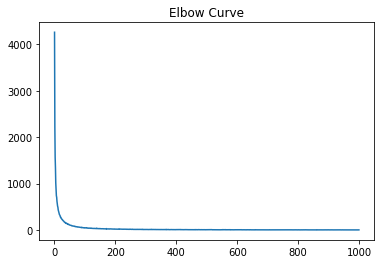


ENDING TIME: 1608273256.8016071
The elapsed time is 0.1385478973388672 seconds
The elapsed time is 0 H: 0 M: 0.139 S



In [9]:
import time
begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")

plt.figure()
plt.plot(n_clusters,sse)
plt.title('Elbow Curve')
plt.show()

end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

In [10]:
N_CLUSTERS_N = 150

In [11]:
import time

begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")

#Fitting kmeans on the data
kmeans = MiniBatchKMeans(n_clusters = N_CLUSTERS_N)
kmeans.fit(X)

end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

STARTING TIME: 1608273256.8265033


ENDING TIME: 1608273257.0991263
The elapsed time is 0.27262306213378906 seconds
The elapsed time is 0 H: 0 M: 0.273 S



STARTING TIME: 1608273257.113219


ENDING TIME: 1608273257.1357837
The elapsed time is 0.02256464958190918 seconds
The elapsed time is 0 H: 0 M: 0.023 S



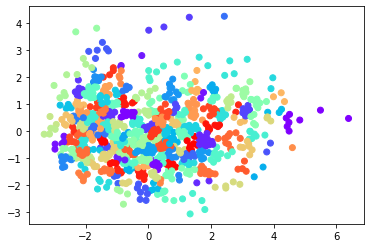

In [12]:
import time
begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")

#Plotting the Kmeans clusters
plt.scatter(X[:,0], X[:,1], c = kmeans.labels_, cmap = 'rainbow')

end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

In [13]:
import time
begin = time.time()
print("STARTING TIME: " + str(begin) + "\n")
#print(kmeans.labels_)
#thing1.sort(key=lambda x: x[1])
thing3 = list( zip([ item[0:3] for item in thing1[0:TRAINING_DATA_SIZE] ], kmeans.labels_) )
thing3.sort(key=lambda x: x[1])
for x in thing3:
    print(x)

end = time.time()
elapsed = end - begin
print("\nENDING TIME: " + str(end))
print("The elapsed time is " + str(elapsed) + " seconds")
convertSeconds2HMS(elapsed)

STARTING TIME: 1608273257.3506215

(['1995', 'Valley of the Shadow - Instrumental', '77kzsKzeF53njh9vQ2f8Ct'], 0)
(['1998', 'Silent Track', '0o12mLSQuXFgsh4e2Kc4e5'], 0)
(['1995', 'Piano Concerto No. 21 in C Major, K. 467 "Elvira Madigan": II. Andante', '2YarjDYjBJuH63dUIh9OWv'], 0)
(['1977', 'Brazilian Rhyme (aka Ponta de Areia)', '1bBY01q1I7hziu59ZVEm39'], 0)
(['1941', 'Images Book II, L. 111: I. Cloches à travers les feuilles', '1tVFuhqNW83b4fKyalxAjy'], 0)
(['1983', 'Cello Suite No. 3 in C Major, BWV 1009: IV. Sarabande', '5MvmCcMhBScIqli00VTblQ'], 0)
(['2005', 'Symphony No. 1, "Afro-American": II. Sorrow (Adagio)', '12KMREUbKErP77HI7Av6Gq'], 0)
(['1940', 'The Rite of Spring: Adoration of the Earth - The Oldest-and-Wisest', '3B0F82pCIPxolkc7mztEF6'], 0)
(['1952', 'Prelude And Wintergreen For President', '73c7a68bRXATB1sjTsSY6J'], 1)
(['1990', 'A Reason To Believe', '4HZwXBG83ayZsvPh4Oule4'], 1)
(['1972', 'Guitar Man', '0gZXockVcE7rEhSf4mcGLO'], 1)
(['2012', 'Through the Valley', '6